# CIFAR-10 Dataset

In [97]:
# Import Libraries
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msnum 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import torch
import torchvision
import torchvision.transforms as transforms
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, ToPILImage
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

## Exploratory Data Analysis

The Cifar-10 dataset is a set of 60000 32x32 colour images. They are separated in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.<br/>
The classes are mutually exclusive, meaning no image can belong to more than one category at the same time.<br/>
The dataset can be imported directly using keras.datasets. 

In [91]:
from keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

labels = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Data Explanation

* **X_train, X_test**: Numpy array of sizes 50000 and 10000 items, respectively. They contain all the images of their datasets and store them as pixels. Look at the list below for a clear explanation of how the values and pixels are stored:
  * **X_train**: Numpy array of all images. Size = 50000
  * **X_train[0]**: Numpy array of all pixels in the image, functions as a 32x32 matrix with all the pixels. Size = 32
  * **X_train[0][0]**: Numpy array of a single column of pixels. Size = 32
  * **X_train[0][0][0]**: Numpy array of a single pixel, stores the RGB values. Size = 3
  * **X_train[0][0][0][0]**: Integer representing a single RGB value of a pixel.
* **Y_train, Y_test**: Numpy array of the correct category of the image. Categories key:
  * **0**: Airplane
  * **1**: Automobile
  * **2**: Bird
  * **3**: Cat
  * **4**: Deer
  * **5**: Dog
  * **6**: Frog
  * **7**: Horse
  * **8**: Ship
  * **9**: Truck

### Cleaning the Data

Luckily, this dataset is complete and there are no missing values that must be dealt with.

### Transforming the Data

Our target variable is represented as integers in the Y sets. Therefore, it already uses Ordinal Encoder and is a 1D array, so it should be good to go. There is no need to modify these arrays further.





However, we need to use One Hot Encoding to make sure the data works properly with the models.<br/>
In the cell below, you can clearly see how each item is represented by a single integer. One Hot Encoding changes each element from an integer to a vector with ten elements, where the index with a 1 as the value represents the class of that image.

In [4]:
Y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

Now that we have dealt with the target variable, we can scale the RGB values of the pixels from 0-255 to 0-1.

In [5]:
xtest = X_test / 255
xtrain = X_train / 255

We must modify the predictor variables even further. Currently, they are stored in a 4D array. However, none of the models work with shape of arrays. Therefore, we must convert them into 2D arrays. Each row will have all the values in a very long array.

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
xtrain = X_train.reshape(50000, 32*32*3)
xtest = X_test.reshape(10000, 32*32*3)
xtrain.shape

(50000, 3072)

We can implement a custom transformer that will scale the values and reshape the datasets.

In [8]:
def transform(train, test):
    train = train / 255
    test = test / 255
    train = train.reshape(50000, 32*32*3)
    test = test.reshape(10000, 32*32*3)
    return train, test

In [9]:
X_train, X_test = transform(X_train, X_test)

## Models

We will create a few different models and test their accuracies later on.<br/>
Since we are trying to predict the category of the image, we must use Classifier Algorithms since it is a categorical variable.

### Stochastic Gradient Descent (SGD) Classifier

The first model we are working with is the Stochastic Gradient Descent (SGD) Classifier.<br/>
This model implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [10]:
sgd_clf = SGDClassifier(alpha=0.01, max_iter=200, random_state=42, n_jobs = -1)

In [ ]:
sgd_clf.fit(X_train, Y_train)

#### K Fold Cross Validation

In [ ]:
scores_sgd = sklearn.model_selection.cross_val_score(sgd_clf, X_test, Y_test, cv=10)

In [25]:
print('Mean Score: ', scores_sgd.mean())

Mean Score:  0.3443


### Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [14]:
random_forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [ ]:
random_forest.fit(X_train, Y_train)

#### K Fold Cross Validation

In [ ]:
scores_forest = sklearn.model_selection.cross_val_score(random_forest, X_test, Y_test, cv=10)

In [17]:
print('Mean Score: ', scores_forest.mean())

Mean Score:  0.3131


### K-Nearest Neighbours (KNN) Classifier

Classifier implementing the k-nearest neighbors vote.<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [18]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
knn.fit(X_train, Y_train)

#### K Fold Cross Validation

In [ ]:
scores = sklearn.model_selection.cross_val_score(knn, X_test, Y_test, cv=10)

In [21]:
print('Mean Score: ', scores.mean())

Mean Score:  0.2877


### One-vs-One (OvO) Classifier

This strategy consists in fitting one classifier per class pair. At prediction time, the class which received the most votes is selected. Since it requires to fit n_classes * (n_classes - 1) / 2 classifiers, this method is usually slower than one-vs-the-rest, due to its O(n_classes^2) complexity. However, this method may be advantageous for algorithms such as kernel algorithms which don’t scale well with n_samples. This is because each individual learning problem only involves a small subset of the data whereas, with one-vs-the-rest, the complete dataset is used n_classes times.<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

ovr = LogisticRegression(multi_class='ovr')

In [ ]:
ovr.fit(X_train, Y_train)

In [49]:
Y_pred = ovr.predict(X_train)

#### K Fold Cross Validation

In [ ]:
scores = sklearn.model_selection.cross_val_score(ovr, X_test, Y_test, cv=10)

In [52]:
print('Mean Score: ', scores.mean())

Mean Score:  0.34319999999999995


## Model Evaluation

### ROC Curve

We will generate an ROC Curve for the SGD Classifier to predict the probability of a binary outcome for the first two classes (Airplanes and Autombiles).<br/>
I had to cut down the size of the test datasets because they were too big for the ROC Curve to work.

In [94]:
from sklearn.preprocessing import label_binarize
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X = X_train[:100]
y = Y_test[:100]
X = X / 255
X = X.reshape(100, 32*32*3)
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
# Code to plot the ROC curve from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html 

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

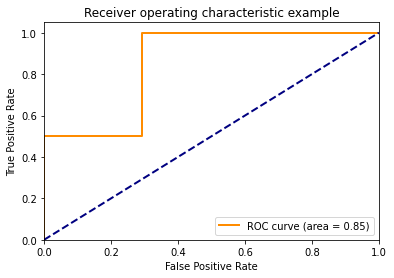

In [96]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

We will also generate a Confusion Matrix for the SGD Classifier.

In [32]:
mat = sklearn.metrics.confusion_matrix(Y_test, Y_pred)

In [33]:
mat

array([[422,  70, 122,  10,  16,   2,  58,  22, 177, 101],
       [ 35, 557,  47,  15,  10,   3,  71,  27,  84, 151],
       [ 85,  73, 363,  43,  40,   6, 243,  39,  56,  52],
       [ 50, 111, 173, 132,  31,  25, 299,  15,  55, 109],
       [ 35,  56, 255,  35, 146,   3, 314,  72,  25,  59],
       [ 60, 112, 193, 122,  38,  63, 219,  43,  89,  61],
       [ 13,  76,  91,  46,  33,   8, 628,  19,  22,  64],
       [ 45, 107, 139,  36,  39,  13, 105, 315,  45, 156],
       [ 90,  86,  71,  21,  13,   3,  42,   7, 572,  95],
       [ 41, 237,  34,   9,   8,   2,  62,  22, 126, 459]], dtype=int64)